In [1]:
#%%capture
import delfi.distribution as dd
import delfi.utils.io as io
import numpy as np
import pickle

import delfi.inference as infer
import delfi.generator as dg
from delfi.simulator import GaussMixture
import delfi.summarystats as ds

%run -i DDELFI.py


def run_panel_a(algo, seed, rounds=5, n_train=[200, 1000]):
    n_params = 1
    m = GaussMixture(dim=n_params, noise_cov=[1.0, 0.01], seed=seed)
    p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
    s = ds.Identity()
    g = dg.Default(model=m, prior=p, summary=s)

    obs = np.array([[0.]])
    kwargs = {'generator': g, 
              'reg_lambda': 0.01,
              'n_components': 2, 
              'n_hiddens': [20], 
              'verbose' : True,
              'obs': obs.copy(),
              'seed': seed}

    
    train = []
    for r in range(rounds):
        train.append(n_train[0])
    train[-1] = n_train[-1]

    
    round_cl=999
    minibatch=100
    n_gradients = 100000
    epochs = [n_gradients // (n_train//minibatch) for n_train in train]
    

    print('n_train :', train)
    print('epochs :', epochs)
    
    if algo == 'CDELFI':
        inf = infer.CDELFI(**kwargs)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,         
                                              n_rounds=len(train),
                                              epochs=epochs)
    elif algo == 'SNPE':
        inf = infer.SNPE(**kwargs,convert_to_T=3)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,                                              
                                              n_rounds=len(train),
                                              epochs=epochs, 
                                              round_cl=round_cl)        
    elif algo == 'kSNPE':
        inf = infer.SNPE(**kwargs,convert_to_T=3)
        log, train_data, posteriors = inf.run(n_train=train,
                                              minibatch=minibatch,                                              
                                              n_rounds=len(train),
                                              epochs=epochs, 
                                              kernel_loss='x_kl', 
                                              round_cl=round_cl)              
    elif algo == 'DDELFI':
        inf = DDELFI(**kwargs, convert_to_T=3)
        log, train_data, posteriors, _ = inf.run(n_train=train,
                                                 minibatch=minibatch,                                              
                                                 n_rounds=len(train),
                                                 epochs=epochs)              
    
    else:
        raise ValueError
        
    try:
        posterior = inf.predict(obs)
    except:
        posterior = None
    
    return {'algo': algo,
            'rounds': rounds,
            'seed': seed,
            'posterior': posterior,
            'log': log,
            'train_data': train_data,
            'posteriors': posteriors
           }


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))


n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

loss=[ 3.50437737]: : 6it [00:00, 45.69it/s]

loss=[ 3.33421993]: : 1763it [00:21, 80.94it/s]


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

loss=[ 4.44104576]: : 0it [00:00, ?it/s]

loss=[ 4.41337204]: : 1090it [00:16, 65.81it/s]


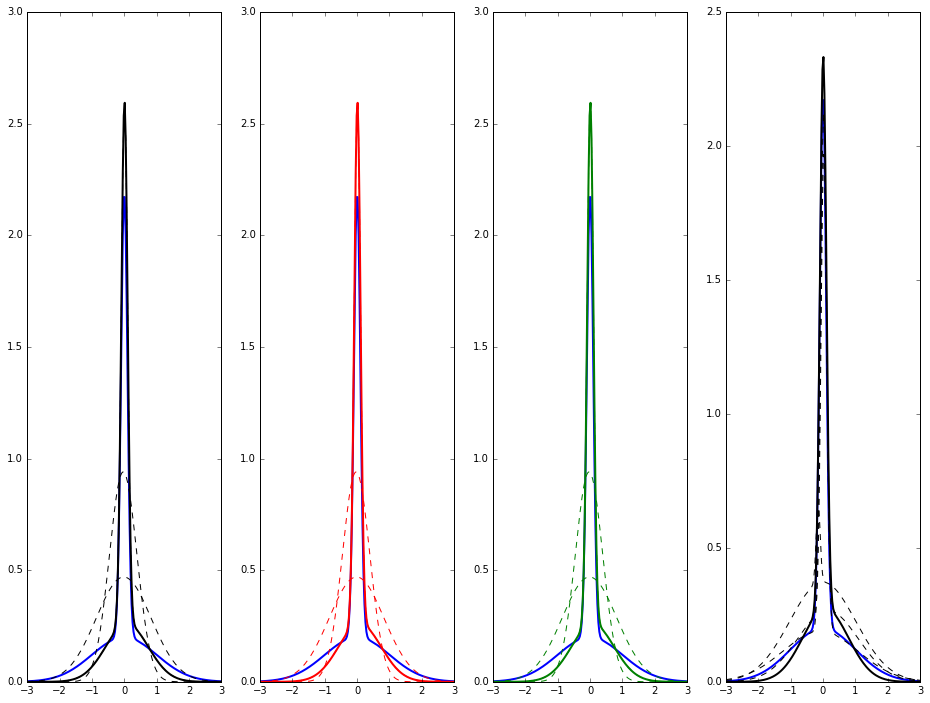

n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))


n_train : [400, 400, 1000]
epochs : [25000, 25000, 10000]


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=400), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

loss=[ 3.16486382]: : 14it [00:00, 81.21it/s] 

loss=[ 3.14891052]: : 1618it [00:12, 132.55it/s]


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000000), HTML(value='')))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

seeds = range(90,95)#range(90, 110)
n_train = [400, 400, 1000]
rounds = len(n_train)

all_outs_SNPE, all_outs_kSNPE, all_outs_CDELFI, all_outs_DDELFI = [], [], [], []
p_true = dd.MoG(a=[0.5, 0.5], ms=[np.asarray([0.]), np.asarray([0.])], Ss=[1.0*np.eye(1), 0.01*np.eye(1)])

for seed in seeds:
    
    plt.figure(figsize=(16,12))

    out = run_panel_a(algo='CDELFI', rounds=rounds, seed=seed, n_train=n_train)
    #out_SNPE = run_panel_a(algo='SNPE', rounds=rounds, seed=seed, n_train=n_train)
    #for r in range(rounds):
     #   w = out_SNPE['train_data'][r][2]
      #  w /= w.sum()
       # print('ESS:' + str(1/np.sum(w**2)) + '/' + str(w.size))

    #out_kSNPE = run_panel_a(algo='kSNPE', rounds=rounds, seed=seed, n_train=n_train)
    #for r in range(rounds):
     #   w = out_kSNPE['train_data'][r][2]
      #  w /= w.sum()
       # print('ESS:' + str(1/np.sum(w**2)) + '/' + str(w.size))

    out_DDELFI = run_panel_a(algo='DDELFI', rounds=rounds, seed=seed, n_train=n_train)
    
    #out = out_DDELFI
    out_SNPE = out
    out_kSNPE = out
    
    xx = np.linspace(-3, 3, 200).reshape(-1,1)
    
    plt.subplot(1,4,1)
    plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    try:
        plt.plot(xx,      out['posterior'].eval(xx, log=False), 'k', linewidth=2)
    except:
        tmp = out['posteriors'][-2] if out['posteriors'][-1] is None else out['posteriors'][-1]
        plt.plot(xx,      tmp.eval(xx, log=False), 'k')
    for r in range(rounds):
        try:
            plt.plot(xx, out['posteriors'][r].eval(xx, log=False), 'k--')
        except:
            pass
        
    plt.subplot(1,4,2)
    plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    plt.plot(xx, out_SNPE['posterior'].eval(xx, log=False), 'r', linewidth=2)
    for r in range(rounds):
        plt.plot(xx, out_SNPE['posteriors'][r].eval(xx, log=False), 'r--')
    
    plt.subplot(1,4,3)    
    plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    plt.plot(xx,out_kSNPE['posterior'].eval(xx, log=False), 'g', linewidth=2)
    for r in range(rounds):
        plt.plot(xx,out_kSNPE['posteriors'][r].eval(xx, log=False), 'g--')
    
    plt.subplot(1,4,4)
    plt.plot(xx,                p_true.eval(xx, log=False), 'b', linewidth=2)
    try:
        plt.plot(xx, out_DDELFI['posterior'].eval(xx, log=False), 'k', linewidth=2)
    except:
        tmp = out_DDELFI['posteriors'][-2] if out_DDELFI['posteriors'][-1] is None else out_DDELFI['posteriors'][-1]
        plt.plot(xx,      tmp.eval(xx, log=False), 'k')
    for r in range(rounds):
        try:
            plt.plot(xx, out_DDELFI['posteriors'][r].eval(xx, log=False), 'k--')
        except:
            pass        
        
    #print('kernel cov: ', 1./out_kSNPE['log'][-1]['cbkrnl'].A )
    all_outs_SNPE.append(out_SNPE)
    all_outs_kSNPE.append(out_kSNPE)
    all_outs_CDELFI.append(out)
    all_outs_DDELFI.append(out_DDELFI)
    
    plt.show()

In [3]:

np.save('MoG_1D_bimodal_20seeds_3round_N1800_results', 
        {'seeds' : seeds, 
         'n_train' : n_train,
         'rounds' : rounds, 
         
         'p_true' : p_true,
         
         'res_CDELFI' : all_outs_CDELFI,
         'res_kSNPE' : all_outs_kSNPE,
         'res_SNPE' : all_outs_SNPE,
         'res_DDELFI' : all_outs_DDELFI,
    })

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,rounds*4))

fail_count_CDELFI = 0
for i in range(len(seeds)):
    
    seed = seeds[i]

    out = all_outs_CDELFI[i]
    out_SNPE = all_outs_SNPE[i]
    out_kSNPE = all_outs_kSNPE[i]
    
    xx = np.linspace(-1.5, 1.5, 200).reshape(-1,1)

    broke_flag = False
    for r in range(rounds):
        if rounds > len(n_train) and r < rounds-1:
            r_ = 0
        elif rounds > len(n_train) and r == rounds-1:
            r_ = len(n_train)-1
        else: 
            r_ = r
        plt.subplot(rounds,3,1 + r*3)
        plt.plot(-20, -20, 'b--', linewidth=1.5)
        if r == rounds-1:
            try:
                plt.plot(xx,      out['posterior'].eval(xx, log=False), 'b', linewidth=2)
            except:
                tmp = out['posteriors'][-2] if out['posteriors'][-1] is None else out['posteriors'][-1]
                plt.plot(xx,      tmp.eval(xx, log=False), 'b--')
                broke_flag=True
                fail_count_CDELFI += 1
        else:
            plt.plot(xx, out['posteriors'][r].eval(xx, log=False), 'b')
        if r == 0:
            plt.title('CDE-LFI')
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.ylabel('round #' + str(r+1) + '(N=' + str(n_train[r_]) + ')')
        plt.axis([-1.5, 1.5, 0, 2.7])
        plt.yticks([])
        plt.xticks([-1, 0, 1])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
        if broke_flag:
            plt.legend(['fail (' + str( fail_count_CDELFI ) + '/' +  str(len(seeds))  + ')'], loc=1, frameon=False)

        plt.subplot(rounds,3,2 + r*3)
        plt.plot(xx, out_SNPE['posteriors'][r].eval(xx, log=False), 'r', linewidth=2)
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        if r == 0:
            plt.title('SNPE')
        plt.axis([-1.5, 1.5, 0, 2.7])
        plt.yticks([])
        plt.xticks([-1, 0, 1])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')

        plt.subplot(rounds,3,3 + r*3)    
        plt.plot(xx,out_kSNPE['posteriors'][r].eval(xx, log=False), 'g', linewidth=2)
        if r == 0:
            plt.title('kSNPE')
        plt.plot(xx,                p_true.eval(xx, log=False), 'k', linewidth=2)
        plt.axis([-1.5, 1.5, 0, 2.7])
        plt.yticks([])
        plt.xticks([-1, 0, 1])
        plt.tick_params(top='off', left='off', right='off', labelleft='off', labelbottom='on')
    plt.suptitle('MoG_1D_bimodal_20seeds_3round_N1800')
    plt.savefig('MoG_1D_bimodal_20seeds_3round_N1800.pdf')
    
plt.show()

In [ ]:
obs = np.array([[0]])

def un_zscore(trn_data_r, seed):
    
    m = GaussMixture(dim=1, noise_cov=[1.0, 0.01], seed=seed)
    p = dd.Uniform(lower=[-10], upper=[10], seed=seed)
    s = ds.Identity()
    g = dg.Default(model=m, prior=p, summary=s)
    
    _,_ = g.gen(1, skip_feedback=True, verbose=False) # DELFI uses this to figure the shape of th, x

    _, stats = g.gen(100, verbose=False)
    stats_mean = np.nanmean(stats, axis=0)
    stats_std = np.nanstd(stats, axis=0)    
    
    return (trn_data_r[1] * stats_std) + stats_mean        
        
def reg_adj(th, x, xo, mu, sig):
                
    return mu(xo) + sig(xo) * (th - mu(x))/sig(x)

thp = p_true.gen(100000)
p_uni = dd.Gaussian(m=-0.11701747*np.ones(1), S=0.65295111*np.eye(1))
plt.figure(figsize=(16,16))

ll_unim = np.zeros(len(seeds))
ll_true = np.zeros(len(seeds))
ll_test = np.zeros(len(seeds))
conv_mat = np.zeros((len(seeds), len(seeds)))

for i in range(len(seeds)):    
    r = 0
    trn_data = all_outs_SNPE[i]['train_data'][r]

    x = un_zscore(trn_data, seeds[i])

    def mu(x):
        return x
    def sig(x):
        return 1.

    th_ = reg_adj(trn_data[0], x, obs, mu, sig)

    plt.subplot(4,5,i+1)
    plt.hist(th_, bins=np.linspace(-3, 3, 20), normed=True)
    plt.title('seed ' + str(seeds[i]) + ', round ' + str(r+1))
    
    ll_unim[i] = np.sum(p_uni.eval(th_))
    ll_true[i] = np.sum(p_true.eval(th_))
    ll_test[i] = np.sum(all_outs_SNPE[i]['posteriors'][r].eval(thp))
    
plt.show()

#plt.plot(ll_unim, 'ro-')

plt.plot(ll_true, 'bo-')
plt.ylabel('log-prob under true posterior')
plt.xlabel('#seed')
plt.show()


plt.plot(ll_test, ll_true, 'bo')
plt.ylabel('log-prob of data under true posterior')
plt.xlabel('log-prob of poster draws under fitted model')
plt.show()

print( np.corrcoef(ll_test, ll_true) )

In [ ]:
seed = 42

out = run_panel_a(algo='CDELFI', rounds=2, seed=seed)

out_SNPE = run_panel_a(algo='SNPE', rounds=2, seed=seed)
w = out_SNPE['train_data'][-1][2]
w /= w.sum()
print(1/np.sum(w**2))

out_kSNPE = run_panel_a(algo='kSNPE', rounds=2, seed=seed)
w = out_kSNPE['train_data'][-1][2]
w /= w.sum()
print(1/np.sum(w**2))

%matplotlib inline
import matplotlib.pyplot as plt

p_true = dd.MoG(a=[0.5, 0.5], ms=[np.asarray([0.]), np.asarray([0.])], Ss=[1.0*np.eye(1), 0.01*np.eye(1)])

plt.figure(figsize=(12,12))
xx = np.linspace(-10, 10, 200).reshape(-1,1)
plt.plot(xx,                p_true.eval(xx, log=False), 'b--')
plt.plot(xx,      out['posterior'].eval(xx, log=False), 'k')
plt.plot(xx, out_SNPE['posterior'].eval(xx, log=False), 'r')
plt.plot(xx,out_kSNPE['posterior'].eval(xx, log=False), 'g')

plt.plot(xx, out_kSNPE['log'][-1]['cbkrnl'].eval(xx), ':', color='m')

plt.show()

In [ ]:
seed = 44

out = run_panel_a(algo='CDELFI', rounds=2, seed=seed)

out_SNPE = run_panel_a(algo='SNPE', rounds=2, seed=seed)
w = out_SNPE['train_data'][-1][2]
w /= w.sum()
print(1/np.sum(w**2))

out_kSNPE = run_panel_a(algo='kSNPE', rounds=2, seed=seed)
w = out_kSNPE['train_data'][-1][2]
w /= w.sum()
print(1/np.sum(w**2))

%matplotlib inline
import matplotlib.pyplot as plt

p_true = dd.MoG(a=[0.5, 0.5], ms=[np.asarray([0.]), np.asarray([0.])], Ss=[1.0*np.eye(1), 0.01*np.eye(1)])

plt.figure(figsize=(12,12))
xx = np.linspace(-10, 10, 200).reshape(-1,1)
plt.plot(xx,                p_true.eval(xx, log=False), 'b--')
plt.plot(xx,      out['posterior'].eval(xx, log=False), 'k')
plt.plot(xx, out_SNPE['posterior'].eval(xx, log=False), 'r')
plt.plot(xx,out_kSNPE['posterior'].eval(xx, log=False), 'g')

plt.plot(xx, out_kSNPE['log'][-1]['cbkrnl'].eval(xx), ':', color='m')

plt.show()